# Linear Regression

# Simple Linear Regression

Running a simple linear regression in Python is fairly simple if you know the relevant functions. What might be confusing is that there exist several packages which provide functions for linear regression. Here it is shown how to do it with the `statsmodels.api` (sub-)package, however other packages such as e.g. `scikit-learn` have similar functions too. 

In [1]:
# Load relevant packages
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

C:\Users\Ben Zimmermann\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# From Advertising data set read cols 2:4
url = 'http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv'
ad = pd.read_csv(url, sep=',', usecols=(np.arange(1, 5, 1)))
print(ad.head())

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [3]:
# Run regression and calculate fit
reg = sm.OLS(ad.sales, exog=sm.add_constant(ad.TV)).fit()
# Alternatively: reg = sm.OLS(ad.sales, sm.add_constant(ad.TV)).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 14 Sep 2017   Prob (F-statistic):           1.47e-42
Time:                        10:18:56   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Side note:** If you are the `R` guy and prefer their syntax, you could import the statsmodels.formula.api subpackage and run something like:

`from statsmodels.formula.api import ols
reg = ols("Sales ~ TV", data=ad).fit()
reg.summary()`

Intercept will automatically be calculated in the above setting.

Both p-values for intercept ($\hat{\beta}_0$) and slope ($\hat{\beta}_1$) are smaller than any reasonable significance level and thus we can reject the null hypothesis that either of the coefficients is zero (or irrelevant).

Instead of printing the whole summary, we could also access each of the three summary as follows:

In [4]:
reg.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


## Plotting the Fit

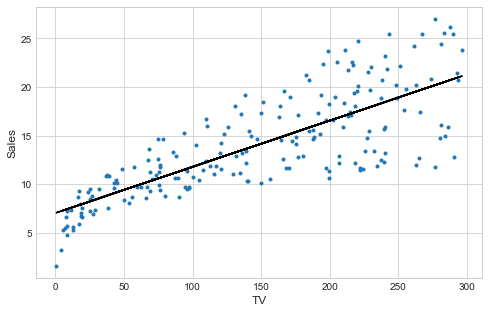

In [5]:
# Plot scatter & lm
plt.figure(figsize=(8,5))
plt.scatter(ad.TV, ad.sales, marker='.', label='Sample')
plt.plot(ad.TV, reg.fittedvalues, c='k', label='Fit')
plt.ylabel('Sales', fontsize=12)
plt.xlabel('TV', fontsize=12);

Let's plotting residuals versus fitted values to do some visual regression diagnostics:

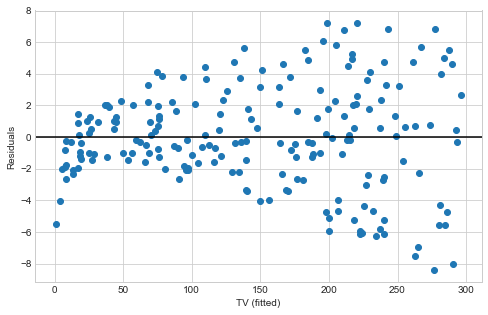

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(ad.TV, reg.resid)
plt.axhline(y=0, c='k')
plt.xlabel('TV (fitted)')
plt.ylabel('Residuals');

The statsmodel package has some built-in plotting functions suited **for visual fit diagnostics**. We will not discuss them here but if interested you'll find plenty of sources on the web (e.g. [here](http://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html), [here](http://www.statsmodels.org/stable/graphics.html) or [here](http://mpastell.com/2013/04/19/python_regression/))

## Accessing the Output

The `reg` objection contains a ton of information which you can all access. To see what there is, type `reg.` and press tab. Two examples are shown below. Notice that some are attributes (like `x.shape`, `x.size`) and don't need paranthesis to call them. Others are methods (similar to `.sum()`, `.min()`) and require parenthesis.

In [7]:
# Regression coefficients
print(reg.params, '\n')
print(reg.resid.head())

const    7.032594
TV       0.047537
dtype: float64 

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
dtype: float64


# Confidence Intervals & Hypthesis Testing

The 95%-confidence interval (CI) is printed in the summary above. If one wishes to calculate it for a different significance level (`alpha`), it is done as follows:

In [8]:
# 99% CI (alpha = 1%) based on t-distribution
reg.conf_int(alpha=0.01)

,0,1
const,5.841796,8.223391
TV,0.040539,0.054535


The regression summary provides $t$-statistic and p-value for the null hypothesis $H_0: \hat{\beta}_j = 0$, $H_a: \hat{\beta}_j \neq 0$. You can call the resulting $t$-statistic and p-value with its attributes.

In [9]:
print(reg.tvalues, '\n')
print(reg.pvalues)

const    15.360275
TV       17.667626
dtype: float64 

const    1.406300e-35
TV       1.467390e-42
dtype: float64


If you wish to test a different null hypothesis, e.g. $H_0: \hat{\beta}_{TV} = 0.054$ vs. $H_0: \hat{\beta}_{TV} \neq 0.054$ use the following code:

In [10]:
reg.t_test('TV=0.054')

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0475      0.003     -2.402      0.017       0.042       0.053

As far as I know, `Statsmodels` does not provide a function to calculate 'greater than' or 'smaller than' alternative hypothesis. Reason being: because with symmetric distributions, the one-sided test can be backed out from the two-sided test. A one-sided p-value is just half of the two-sided p-value. This means that given p and $t$ values from a two-tailed test, you would reject the null hypothesis of a greater-than test when p/2 < alpha and $t$ > 0, and of a less-than test when p/2 < alpha and $t$ < 0.

## Coefficient of Determination

The $R^2$ measure, or "Coefficient of determination", displays the proportion of the variability in $y$ that is well explained by the regression fit. It is defined as 

$$\begin{equation}
R^2 = \frac{TSS - SSR}{TSS} = 1 - \frac{SSR}{TSS}
\end{equation}$$

where TSS is the *total sum of squares*, defined as $TSS = \sum (y_i - \bar{y})^2$, and SSR is the *sum of squared residuals*, given by $SSR = \sum (y_i - \hat{y}_i)^2$.

It is easy to call the $R^2$ value from the regression object `reg` as the following line shows.

In [11]:
# R squared measure
reg.rsquared

0.61187505085007099

## Regression Diagnostics
### Test of Homoskedasticity

In general we assume a constant variance of the error term (homoskedasticity; $Var(\epsilon_i) = \sigma^2$ for $i = 1, \ldots, N$). From the residuals vs. fitted plot we have to question this assumption. To test it mathematically, you can run a heteroskedasticity test. The stats package offers several test options; the more common ones are White's or the one from Breusch-Pagan. See [here for more details](http://www.statsmodels.org/dev/diagnostic.html) on tests on heteroskedasticity.

Below the White test is applied as an example. The parameter 'reg.model.exog' simply contains the X matrix (here a 200x2 matrix with constant 1 in first column and values for TV in second). Instead of calling the `reg` object, we could also use `Xconst` from above. The output becomes clear when you check the function's help page (use `?sm.stats.diagnostic.het_white`). 

The null hypothesis is that the error variance does **not** depend on x, thus is homoskedastic. Based on the large f-statistic value we can gently reject the null-hypothesis that the error variance is homoskedastic.

In [12]:
# Test for heteroskedasticity with White test
wht = sm.stats.diagnostic.het_white(resid=reg.resid, exog=reg.model.exog)
print('f-statistic: {0:>19.4f} \n'
      'p-value for f-statistic: {1:>7.4f}'.format(wht[2], wht[3]))

f-statistic:             35.1683 
p-value for f-statistic:  0.0000


If you wish to run tests with heteroskedastistic robust standard errors you can either access the `reg` object's robust standard errors (`reg.HC0_se`, `reg.HC1_se`, `reg.HC2_se`, `reg.HC3_se`) or, more conveniently, run directly define the covariance estimator (e.g. 'HC3' as below) when you generate the object in the first place. Below example shows how you can do this. See also [here](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html) or [here](https://stackoverflow.com/questions/30553838/getting-statsmodels-to-use-heteroskedasticity-corrected-standard-errors-in-coeff) for some further information.

In [13]:
regRobust = sm.OLS(ad.sales, exog=sm.add_constant(ad.TV)).fit(cov_type='HC3')
print(regRobust.HC3_se, '\n')
print(reg.HC3_se)

const    0.336426
TV       0.002890
dtype: float64 

const    0.336426
TV       0.002890
dtype: float64


### Other Relevant Checks

The `statsmodels` package offers many more functions to run regression diagnostics, e.g. checks for autocorrelation, non-linearity, normality of residuals etc. These functions are applicable to both simple as well as multiple linear regression models. There's a short [Jupyther notebook](http://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html) detailing some of the options. 

## Application: Stock Beta

A stock beta measures the systematic risk of a security, the tendency of a security to respond to swings in the broad market. Typically, a large, well diversified index is taken as a proxy for the market portfolio (e.g. S&P500, Euro Stoxx 50, SMI, etc.). There are different ways to calculate a stock beta. We will show the regression approach, where a stock's beta is the slope of the following linear regression:

$$\begin{equation}
r - r_f = \alpha + \beta(r_M - r_f) + e
\end{equation}$$

Let us look into Geberit's stock beta. As a proxy for the market portfolio we use the Swiss market index (SMI). The risk free rate is set to $r_f=0$, which is a fairly reasonable approach in light of [the Swiss national bank's (SNB) interest rates](https://data.snb.ch/de/topics/ziredev#!/cube/zimoma) for the past five years. We will work with monthly returns for the past five years (60 months) - though other approaches (e.g. last 24 monthly returns, weekly returns for last 2 years, etc.) are reasonable choices too.

In [14]:
# Load package to download share prices from web
import pandas_datareader.data as web

# Define tickers, beta obs. period, start & enddate
months = 60
tickers   = ['VTX:GEBN', 'INDEXSWX:SMI']
startdate = '2007-06-01'
enddate   = '2017-06-30'

# Get stock closing price data from google finance
df = pd.DataFrame()
for tick in tickers:
    df[tick] = web.DataReader(tick, data_source='google', 
                              start=startdate, end=enddate)['Close']

In [15]:
# Select business month end closing prices and sort date desc.
df = df.resample('BM').last()  # For business week end chose 'W-FRI'
df = df.sort_index(ascending=False)

# Calculate log-returns
df['GEBNrets'] = np.log(df[tickers[0]] / df[tickers[0]].shift(-1))
df['SMIrets'] = np.log(df[tickers[1]] / df[tickers[1]].shift(-1))

# Select past 60 months return data
dfRets = df.iloc[:months, 2:4]
dfRets.head()

,GEBNrets,SMIrets
Date,,
2017-06-30,-0.013769,-0.012247
2017-05-31,0.000441,0.022881
2017-04-28,0.048371,0.017604
2017-03-31,-0.006464,0.013145
2017-02-28,0.030369,0.030187


In [16]:
# Create OLS object, run regression and calculate fit
regBeta = sm.OLS(endog=dfRets.iloc[:, 0], 
                 exog=sm.add_constant(dfRets.iloc[:, 1])).fit()

# Show table on coefficients
regBeta.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GEBNrets   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     23.61
Date:                Thu, 14 Sep 2017   Prob (F-statistic):           9.33e-06
Time:                        10:18:59   Log-Likelihood:                 107.70
No. Observations:                  60   AIC:                            -211.4
Df Residuals:                      58   BIC:                            -207.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0094      0.005      1.739      0.087      -0.001       0.020
SMIrets        0.8115      0.167      4.859      0.000       0.477       1.146
==============================================================================
Omnibus:                        3.917   Durbin-Watson:                   2.293
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                3.364
Skew:                           0.298   Prob(JB):                        0.186
Kurtosis:                       3.995   Cond. No.                         31.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the regression output we have no reason to reject the null of Geberit's stock beta being equal to zero. The $R^2$ measure, though, shows that only a small amount of the variation in Geberits monthly returns is explained by SMI's monthly returns.

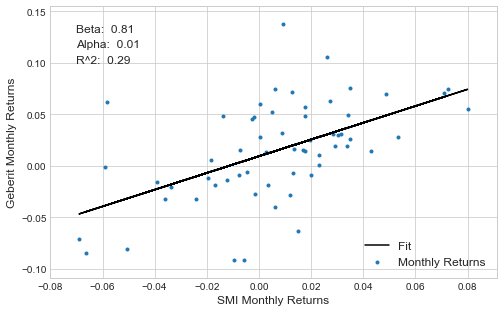

In [17]:
# Get relevant information
beta = regBeta.params['SMIrets']
alpha = regBeta.params["const"]
rsqr = regBeta.rsquared

# Plot scatter & lm; add text with alpha, beta , R2
plt.figure(figsize=(8,5))
plt.scatter(dfRets.SMIrets, dfRets.GEBNrets, marker='.', 
            label='Monthly Returns')
plt.plot(dfRets.SMIrets, regBeta.fittedvalues, c='k', label='Fit')
plt.ylabel('Geberit Monthly Returns', fontsize=12)
plt.xlabel('SMI Monthly Returns', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.text(-0.07, 0.13, 'Beta: {0: .2f}'.format(beta), fontsize=12)
plt.text(-0.07, 0.115, 'Alpha: {0: .2f}'.format(alpha), fontsize=12)
plt.text(-0.07, 0.10, 'R^2: {0: .2f}'.format(rsqr), fontsize=12);

What we calculated above is often referred to as the raw beta. The beta value of a stock has been found to be on average closer to the mean value of 1.0, the beta of an average-systematic-risk portfolio, than to the value of the raw beta (Pinto et al. (2016)). This is why data providers such as Bloomberg publish the adjusted beta as first introduced by Blume (1971), which is calculated as 

$$ \text{Adjusted beta} = 2/3 \cdot \text{raw beta} + 1/3 \cdot 1$$

Now, lets assume we're given the task to investigate whether a beta indeed regresses to 1 over time. For that we could, as a starting point, assess a stock's rolling beta over the past years. Note that this is just an example of use. Computationally it would be much faster to calculate the stock beta via the covariance/variance formula.

In [18]:
def rollingBeta(df, window=60):
    
    '''Calculates the running beta of a stock.
    
    Parameters
    ==========
    df : [n x 2] pandas dataframe with log-returns for
        stock and market portfolio. Index should be
        datetime series.
    window : rolling window with default value 60 [optional]
        
    Returns
    =======
    rb : Pandas dataframe with (backward-looking) rolling beta. 
    '''
    
    # Drop NA rows from df
    df = df.dropna()
    # Set up empty results array
    res = np.empty(len(df) - window + 1)
    
    # Loop through df
    for i in range(0, len(df)):
        
        # As long as remaining subset is >= window, we proceed
        if (len(df) - i) >= window:
            
            # Subset df
            sub = df.iloc[i:window+i, :]
            # Run Regression
            model = sm.OLS(endog=sub.iloc[:, 0],
                           exog=sm.add_constant(sub.iloc[:, 1])).fit()
            # Read out beta coefficient
            res[i] = model.params[1]
    
    # Format output to dataframe
    rb = pd.DataFrame(data=res, index=df.index[:(len(df)-window+1)])
    rb.columns = ['RollingBeta']
    
    return rb

In [19]:
# Call function and save output to 'rollBeta'
rollBeta = rollingBeta(df=df.iloc[:, 2:4], window=24)

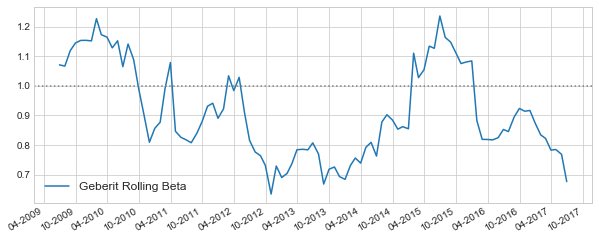

In [20]:
# Import 'mdates' to format dates in x-axis
import matplotlib.dates as mdates

# Plot rolling beta
fig, ax = plt.subplots(1, figsize=(10,4))
ax.plot(rollBeta, label='Geberit Rolling Beta')
ax.axhline(y=1, c='gray', linestyle=':')  # Horizontal line
ax.legend(fontsize=12)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
fig.autofmt_xdate();  # Autorotate x-axis for readability

# Multiple Linear Regression

## Estimating the Regression Coefficients

Simple linear regression serves well to introduce the concept and to build a good understanding. However, in reality we often have to work with more than one predictor. In the advertising data set for example we had not only data on TV advertising spendings but also on radio newspaper. It thus makes sense to extend the simple to a multiple linear regression model.

We again use the Advertising data set to see how this is done in Python. The same functions from the `statsmodels` package apply to multiple linear regression. We run the following regression

$$\text{sales} = \beta_0 + \beta_1 \text{TV} + \beta_2 \text{radio} + \beta_3 \text{newspaper} + \epsilon$$

In [21]:
# Assign features and response to X and y
y = ad.sales
X = ad[['TV', 'radio', 'newspaper']]
X = sm.add_constant(X)

In [22]:
# Run regression and print summary
mlReg = sm.OLS(endog=y, exog=X).fit()
print(mlReg.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 14 Sep 2017   Prob (F-statistic):           1.58e-96
Time:                        10:19:00   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

Again: If you are the `R` guy and prefer their syntax, you could import the statsmodels.formula.api subpackage and run something like:

`from statsmodels.formula.api import ols
mlReg = ols("Sales ~ TV + radio + newspaper", data=ad).fit()
mlReg.summary()`

## Hypothesis Tests

Again the summary above provides $t$-statistic and p-value for each individual regression coefficient. As was the case for the simple linear regression, the underlying null hypothesis is that each parameter is zero ($H_0: \beta_{j,\, H_0} = 0$). For TV and Radio we reject the null even at the 1% significance level. However, given the large p-value for Newspaper we fail to reject the null for $\beta_{\text{Newspaper}} = 0$ at any reasonable level. Thus we can conclude that leaving Newspaper data out might be a reasonable option. If other null hypothesis' ought to be tested, we can use the same command as shown in the simple linear model.

In [23]:
# t-test on H0: beta(TV) = 0.0475
mlReg.t_test('TV=0.0475')

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0458      0.001     -1.244      0.215       0.043       0.049

The output shows that we fail to reject the null hypothesis that $\beta_{TV} = 0.0475$.


Beyond the element-wise hypothesis tests the regression summary also provides the **F-statistic** (and the corresponding p-value) on the combined hypothesis that 

$$\begin{align}
H_0&: \quad \beta_j = \beta_1, \beta_2, \ldots \beta_p = 0 \\
H_a&: \quad \beta_j \neq 0 \text{ for at least one $j$}
\end{align}$$

On the basis of the corresponding p-value we can reject the null on any reasonable significance level. Should we be interested in assessing a particular hypothesis, say 

$$\begin{align}
H_0&: \quad \beta_{TV} = \beta_{\text{Radio}} \\
H_a&: \quad \beta_{TV} \neq \beta_{\text{Radio}}
\end{align}$$
we use the `.f_test()` method. 


In [24]:
# Test H0: beta(radio) = beta(newspaper) = 0
mlReg.f_test('const = radio = newspaper = 0.1')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 126.9935335]]), p=1.0186277412639764e-45, df_denom=196, df_num=3>

See the [documentation page](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.f_test.html) for further examples on how this function can be used.

### Coefficient of Determination

The $R^2$ measure for the MLR is the same as for the SLR. However, in the case of MLR it has one drawback: the value will always increase when more explanatory variables are added to the model - even if those variables are only weakly associated with the response. To make good on this disadvantage a modificated measure is often used: **adjusted $R^2$**.

$$\begin{equation}
R^2_{adj} = 1 - (1-R^2) \frac{n-1}{n-p-1}
\end{equation}$$

To get this measure in Python, simply use the OLS object and call the `.rsquareed_adj` attribute.

In [25]:
mlReg.f_test('TV=radio=newspaper=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 570.27070366]]), p=1.575227256093874e-96, df_denom=196, df_num=3>

## Application: Factor Models



### Fama-French Three Factor Model

We will apply the concept of multiple linear regression in the context of Fama-French's three factor model (Fama and French (1993)). Their model follows Ross' arbitrage pricinge theory which postulates that excess returns are linearly related to a set of systematic risk factors (Ross et al. (1973)). The factors can be returns on other assets, such as the market portfolio, or any other variable (e.g. interest rates, inflation, consumption growth, market sentiment, hedging demands etc.. Fama-French empirically discovered three factors to capture the systematic risk: firm size, book-to-market ratio (B/M) and market risk. To quantify their findings, Fama-French constructed zero-net-investment factor portfolios capturing the systematic risk on firm size ('mall minus big' (SMB), i.e. long on small and short on big size stocks) and B/M ('high minus low' (HML), i.e. long on high B/M, short on low B/M stocks). For details on how these portfolios are constructed see e.g. Bodie et al. (2014). The third factor, market risk, is simply the excess return on a well diversified market portfolio. 

With that, the sensitivity of individual stocks to the three factors is given by the estimated coefficients of a multiple linear regression. As a group they predict the total risk premium. The expected excess return $R_{it}$ of asset $i$ at time $t$ in the Fama-French three-factor model is described by

$$\begin{equation}
R_{it} = \alpha_i + \beta_i^{M} (r_{M,t} - r_{f,t}) + \beta_i^{SMB} SMB_t + \beta_i^{HML} HML_t + \epsilon_{it}
\end{equation}$$

The above Fama-French factors are calculated on a monthly basis and published on [Kenneth R. French's website](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html). There you will also find information on the methodology of the model and lots of other possible factors. To run this regression in Python we use a shortcut. The `pandas_datareader` package is capable of loading the data without having to download a txt or csv file in a separate step. 

We will calculate the factor beta for all 20 SMI stocks. For that we use Fama-French's 'European 3 Factors' data. Following our 'Stock Beta' example from above, the risk free rate for Switzerland is again assumed to be zero over the past 5 years.

### Load Fama-French Data
We start by importing the `pandas_datareader.data` package and defining some key parameter.

In [26]:
import pandas_datareader as web

# Define obs. period, start & enddate
months = 60
startdate = '2012-06-01'
enddate   = '2017-06-30'

** Side Note: ** If you want to know what data is available (and their labels), you can run the `get_available_datasets()` function.

`from pandas_datareader.famafrench import get_available_datasets
get_available_datasets()`

or simply check [Kenneth R. French's website](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)

In [27]:
# Load FF factors 
data = web.DataReader('Europe_3_Factors', data_source='famafrench',
                      start=startdate, end=enddate)

Variable `data` is a dictionary with three entries: monhtly data, annual data and a description. We select the monthly rates in dictionary 0 and format the data.

In [28]:
# Select monthly data
ff = data[0]

# Sort data in descending order
ff = ff.sort_index(ascending=False)

# Convert returns to decimal percentages
ff = ff/100
print(ff.head(3))

         Mkt-RF     SMB     HML      RF
Date                                   
2017-06 -0.0066  0.0166  0.0202  0.0006
2017-05  0.0504 -0.0010 -0.0075  0.0006
2017-04  0.0463  0.0180 -0.0141  0.0005


###  Get SMI Tickers

To get a list of all 20 smi stock tickers we could of course manually write a list. But what if we want to scale our calculations to all SPI stocks? Or to stocks from a particular industry sector? My humble opinion is: manual work is not the answer. It is error prone and irreproducible. Hence we use the 'issuer list' [from the SWX website](https://www.six-swiss-exchange.com/shares/companies/issuer_list_en.html). Data is provided in html and csv format. We load the csv and in the next steps we extract the data we want.

In [29]:
# Load csv file from url
url = 'https://www.six-swiss-exchange.com/shares/companies/download/issuers_all_en.csv'
swx = pd.read_csv(url, sep=';', encoding='latin-1')
print(swx.shape)
swx.head(3)

(259, 15)


,Company,Symbol,Valor Number,Country,Traded Currency,Trading platform,Index-member,Class of Share,Nominal Value,Industry Sector,Listing Segment,Accounting Rules,Next General Meeting,Primary listing,Unnamed: 14
0,3M Company,MMM,1405105,US,CHF,XSWX,,RS,0.00,,International Reporting Standard,,,false,NaN
1,5EL SA,FEL,632685,CH,CHF,XSWX,,BS,3.50,General Financial,Swiss Reporting Standard,Swiss GAAP FER,,true,NaN
2,ABB Ltd,ABBN,1222171,CH,CHF,XSWX,"SMI,SPI,SLCI,SMIEXP,SLI",RS,0.12,Industrial Engineering,International Reporting Standard,US GAAP,,true,NaN


For whatever reason SWX screwed up in creating the file. There are somehow leading white spaces all over the place, in particular in the header. This is never a good thing to have so we get rid of it. 

In [30]:
swx.columns.values

array(['Company', ' Symbol', ' Valor Number', ' Country',
       ' Traded Currency', ' Trading platform', ' Index-member',
       ' Class of Share', ' Nominal Value', ' Industry Sector',
       ' Listing Segment', ' Accounting Rules', ' Next General Meeting',
       ' Primary listing', 'Unnamed: 14'], dtype=object)

In [31]:
swx.rename(columns=lambda x: x.strip(),inplace=True)
swx.columns.values

array(['Company', 'Symbol', 'Valor Number', 'Country', 'Traded Currency',
       'Trading platform', 'Index-member', 'Class of Share',
       'Nominal Value', 'Industry Sector', 'Listing Segment',
       'Accounting Rules', 'Next General Meeting', 'Primary listing',
       'Unnamed: 14'], dtype=object)

From the above extract we see that we are interested in those `Symbol`s where `Index-member` contains `SMI,`. Notice the comma. `SMI` would not be enough as there are also other index names containing SMI (e.g. SMIEXP, SMIM, etc.) 

In [32]:
cond = 'SMI,'
tickers = swx[swx['Index-member'].str.contains(cond)]
tickers = tickers['Symbol']

In [33]:
tickers.iloc[0]

' ABBN'

Here again we have leading white spaces in the ticker symbols. We delete them.

In [34]:
tickers = tickers.str.strip()
tickers.iloc[0]

'ABBN'

Now we can concatenate the Symbols with the letters 'VTX:' to get google finance's tickers.

In [35]:
tickers = 'VTX:'+tickers
print(tickers.head(3))
print(tickers.shape)

2     VTX:ABBN
7     VTX:ADEN
72     VTX:CFR
Name: Symbol, dtype: object
(20,)


### Load Stock Prices

Now we're finally in a position to load the data from google finance.

In [36]:
# Download closing prices of defined shares
shsPr = pd.DataFrame()
for tick in tickers:
    shsPr[tick] = web.DataReader(tick, data_source='google', 
                                 start=startdate, end=enddate)['Close']

# Show data extract
shsPr.head(3)

,VTX:ABBN,VTX:ADEN,VTX:CFR,VTX:CSGN,VTX:GEBN,VTX:GIVN,VTX:BAER,VTX:LHN,VTX:LONN,VTX:NESN,VTX:NOVN,VTX:ROG,VTX:SGSN,VTX:SIK,VTX:SLHN,VTX:SREN,VTX:SCMN,VTX:UHR,VTX:UBSG,VTX:ZURN
Date,,,,,,,,,,,,,,,,,,,,
2012-06-01,15.13,36.87,52.0,18.48,184.9,898.5,30.71,48.19,34.00,54.55,49.97,150.0,1708.0,1761.0,75.85,54.05,352.0,355.9,NaN,197.1
2012-06-04,14.93,36.33,51.0,18.38,181.6,881.5,30.15,47.21,32.81,54.20,49.49,149.2,1687.0,1746.0,75.85,52.55,348.9,350.1,NaN,194.2
2012-06-05,14.99,36.47,51.8,18.49,181.8,881.5,30.20,47.53,32.92,53.90,49.53,149.4,1692.0,1719.0,76.10,52.20,345.6,352.6,NaN,193.1


Due to the changes from UBS AG (UBSN) to UBS Group (UBSG) its stock data on google finance is unfortunately only available back to end of 2014. To fill the missing values, we overwrite the column 'VTX:UBSG' by data from a csv. 

In [37]:
ubs = pd.read_csv('Data/UBSN_HistShsPriceClosing.csv', dayfirst=True,
                  parse_dates=['Date'], index_col='Date')
ubs.columns = ['VTX:UBSG']

shsPr['VTX:UBSG'] = ubs
shsPr.head(3)

,VTX:ABBN,VTX:ADEN,VTX:CFR,VTX:CSGN,VTX:GEBN,VTX:GIVN,VTX:BAER,VTX:LHN,VTX:LONN,VTX:NESN,VTX:NOVN,VTX:ROG,VTX:SGSN,VTX:SIK,VTX:SLHN,VTX:SREN,VTX:SCMN,VTX:UHR,VTX:UBSG,VTX:ZURN
Date,,,,,,,,,,,,,,,,,,,,
2012-06-01,15.13,36.87,52.0,18.48,184.9,898.5,30.71,48.19,34.00,54.55,49.97,150.0,1708.0,1761.0,75.85,54.05,352.0,355.9,10.90,197.1
2012-06-04,14.93,36.33,51.0,18.38,181.6,881.5,30.15,47.21,32.81,54.20,49.49,149.2,1687.0,1746.0,75.85,52.55,348.9,350.1,10.69,194.2
2012-06-05,14.99,36.47,51.8,18.49,181.8,881.5,30.20,47.53,32.92,53.90,49.53,149.4,1692.0,1719.0,76.10,52.20,345.6,352.6,10.70,193.1


### Calculating Returns

Thankfully we can reuse the code from above to calculate (business-end) monthly returns.

In [38]:
# Select business month end closing prices and sort date desc.
shsPr = shsPr.resample('BM').last()
shsPr = shsPr.sort_index(ascending=False)

# Calculate log-returns
shsRets = np.log(shsPr / shsPr.shift(-1))
shsRets.head(3)

,VTX:ABBN,VTX:ADEN,VTX:CFR,VTX:CSGN,VTX:GEBN,VTX:GIVN,VTX:BAER,VTX:LHN,VTX:LONN,VTX:NESN,VTX:NOVN,VTX:ROG,VTX:SGSN,VTX:SIK,VTX:SLHN,VTX:SREN,VTX:SCMN,VTX:UHR,VTX:UBSG,VTX:ZURN
Date,,,,,,,,,,,,,,,,,,,,
2017-06-30,-0.027079,0.009649,-0.022529,0.041243,-0.013769,-0.035343,0.005964,-0.057513,0.032854,0.009633,0.006285,-0.084757,0.007348,-0.012903,0.001546,-0.007388,-0.003667,-0.057880,0.053110,-0.019866
2017-05-31,-0.001232,-0.023273,-0.028669,-0.128915,0.000441,0.035864,-0.033336,0.030557,-0.014353,0.075365,0.035294,0.020909,0.029051,-0.017475,-0.002164,0.019440,0.067702,-0.059746,-0.098846,0.033211
2017-04-28,0.038925,0.037923,0.048670,0.015318,0.048371,0.060755,0.036332,-0.048452,0.071805,-0.002606,0.029160,0.017439,0.046626,0.055030,0.001855,-0.037954,-0.062737,0.104719,0.058751,0.029479


### Calculate Fama-French Factors


In order to run the regression we need to have matching indices. Since we know for sure that the observation period of the downloaded data is identical (from our coding) we can simply overwrite the index of one of the dataframes.

In [39]:
# Create matching indices
ff.index = shsRets.index

We are now in a position to run the multiple linear regression. We will again use the past 60 months. From the Fama French set we just need the first three columns. Column 4 is the risk free rate which we do not use.

In [40]:
# Add constant to matrix for alphas (=intercept)
X = sm.add_constant(ff.iloc[:months, :3])

In [41]:
# Create results matrix to paste beta factors
res = np.empty(shape=(5, len(tickers)))

In [42]:
# Run regression for each ticker
for i in range(0, len(tickers)):
    
    # Select returns of share i
    sub = shsRets.iloc[:months, i]
    # Run regression
    model = sm.OLS(endog=sub, exog=X).fit()
    # Paste beta factors to 'res' matrix
    res[0:4, i] = model.params
    res[4, i] = model.rsquared_adj

In [43]:
# Format output to dataframe
ff3f = pd.DataFrame(data=res, index=['Alpha', 'BetaMkt', 'BetaSMB', 'BetaHML', 'R2_adj'])
ff3f.columns = tickers

And here are our factors:

In [44]:
ff3f

Symbol,VTX:ABBN,VTX:ADEN,VTX:CFR,VTX:CSGN,VTX:GEBN,VTX:GIVN,VTX:BAER,VTX:LHN,VTX:LONN,VTX:NESN,VTX:NOVN,VTX:ROG,VTX:SGSN,VTX:SIK,VTX:SLHN,VTX:SREN,VTX:SCMN,VTX:UHR,VTX:UBSG,VTX:ZURN
Alpha,-0.000139,-0.000785,0.002151,-0.014103,0.012446,0.010088,0.000579,-0.008839,0.019816,0.003811,0.003978,0.003998,0.001624,0.015823,0.015035,0.006850,0.003021,-0.006353,0.000015,0.002759
BetaMkt,0.719063,0.821552,0.879074,0.919705,0.448197,0.471908,0.578659,1.158525,0.755369,0.517951,0.512569,0.469141,0.517374,0.642976,0.471782,0.233459,0.335701,0.861599,0.698502,0.424314
BetaSMB,0.233243,0.663463,-0.888366,0.289915,-0.498065,-0.522577,0.113546,-0.030046,0.358306,-0.423321,-0.380940,-0.351816,-0.404188,-0.366263,0.530929,-0.633873,-0.736779,-0.665754,-0.176852,-0.593401
BetaHML,-0.012150,0.368471,0.217475,1.646272,-0.179689,-0.530125,0.400648,0.253003,-0.233743,-0.634468,-0.499608,-0.375503,-0.474356,-0.039065,0.501731,-0.340712,-0.247771,0.164657,1.082516,0.024130
R2_adj,0.177655,0.349276,0.297871,0.354453,0.101721,0.176823,0.102802,0.403516,0.152450,0.340173,0.172276,0.147376,0.129039,0.157526,0.121903,0.066581,0.152184,0.211774,0.276270,0.100901


In [45]:
# Transpose matrix (.T) and display stats summary
print(ff3f.T.describe())

           Alpha    BetaMkt    BetaSMB    BetaHML     R2_adj
count  20.000000  20.000000  20.000000  20.000000  20.000000
mean    0.003589   0.621871  -0.224142   0.054586   0.199628
std     0.008284   0.227065   0.448690   0.565442   0.100401
min    -0.014103   0.233459  -0.888366  -0.634468   0.066581
25%    -0.000024   0.471122  -0.540283  -0.349410   0.127255
50%     0.002890   0.548305  -0.373601  -0.025607   0.164901
75%     0.007660   0.771915   0.143470   0.281870   0.281670
max     0.019816   1.158525   0.663463   1.646272   0.403516


### Hedge a Portolio

Now that we have all the factors, let's assume we want to build a portfolio with all 20 SMI stocks that maximizes the Sharpe ratio (SR). As a further condition we want to limit our exposure to the SMB factor to, let's say, $\beta_p^{SMB} = 0$. How would we allocate our investment under these conditions? In mathematical terms we have the following optimization problem:

$$\begin{equation}
\max_{w_i} SR = \frac{\mathbb{E}[r_p] - r_f}{\sigma_p} \qquad s.t. \qquad 
\begin{cases}
\sum w_i &= 1 \\
\beta_p^{SMB} &= 0
\end{cases}
\end{equation}$$

Usually, to calculate the expected return $\mathbb{E}[r_p]$, historical returns are taken. For our case here, we will take the expected returns given by our Fama-French 3 Factor model (denoted $\mathbf{R_{ff}}$). The portfolio variance $\sigma_p$ however, we estimate using historical data. Alternatively one could think of taking the SMI volatility index value as proxy. But this is only approximately true because we will not have the same weights per stock as the SMI and this thus might be a questionable. With that we have

$$\begin{equation}
\max_{w_i} SR = \frac{\mathbf{w}^T \left(r_f + \mathbf{\alpha} + \mathbf{\beta}^{M} (r_{M} - r_{f}) + \mathbf{\beta}^{SMB} SMB + \mathbf{\beta}^{HML} HML \right) - r_f}{\mathbf{w}^T \mathbf{\Sigma}\mathbf{w}} \qquad s.t. \qquad 
\begin{cases}
\sum w_i &= 1 \\
\beta_p^{SMB} &= 0
\end{cases}
\end{equation}$$



Python can solve this problem numerically. We first set the stage by defining a auxiliary function `pfStats` that returns the expected portfolio return, volatility and Sharpe ratio given a vector of weights. Note that the function also makes use of other data like monthly returns and the riskfree rate as previously defined (which is again set to 0) but only weights are a function input value. This is necessary for the optimization function.

In [46]:
# Define rf and (equally spread) start weights
rf = 0
wghts = np.repeat(1. / len(tickers), len(tickers))

# Expected stock returns based on ff3f model
expShsRets = rf + ff3f.T.Alpha + \
    ff3f.T.BetaMkt * ff['Mkt-RF'].mean() + \
    ff3f.T.BetaSMB * ff.SMB.mean() + \
    ff3f.T.BetaHML * ff.HML.mean()


In [47]:
def pfStats(weights):
    '''Returns basic measures for a portfolio
    
    Parameters
    ==========
    weights : array-like
        weights for different securities in portfolio
    
    Returns
    =======
    expPfRet : float
        weighted, annualized expected portfolio return based on ff3f model
    pfVol : float
        historical annualized portfolio volatility
    SR : float
        portfolio Sharpe ratio for given riskfree rate
    '''
    
    expPfRet = np.sum(weights * expShsRets) * 12
    pfVol    = np.sqrt(np.dot(weights.T, np.dot(shsRets.cov() * 12, weights)))
    SR       = (expPfRet - rf) / pfVol 
    
    return np.array([expPfRet, pfVol, SR])

Python's scipy package has a sublibrary for constrained optimization problems. We will use the minimize function and minimize the negative value of the Sharpe ratio (which is obviously equal to maximizing the SR)

In [48]:
import scipy.optimize as sco

def minSR(wghts):
    return -pfStats(wghts)[2]

Our constraints are as stated above: $\sum w_i = 1$, $\beta_P^{SMB} = 0$. Additionally we set bounds for the weights such that short/long position are allowed but only up to 100% per share ($w_i \in [-1, 1]\; \forall i \in [1, 2, \ldots, n]$).

In [49]:
# Constraints and bounds
constr = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
          {'type': 'eq', 'fun': lambda x: np.sum(x * ff3f.T.BetaSMB) - 0}]
bnds   = tuple((-1,1) for x in range(len(tickers)))

In [50]:
# Minimization function
optPf = sco.minimize(minSR, x0=wghts, method='SLSQP', bounds=bnds, constraints=constr)

In [51]:
# Check if conditions are actually met
print('Sum of weights:  ', np.sum(optPf['x']))
print('Beta SMB factor: ', np.sum(optPf['x'] * ff3f.T.BetaSMB))

Sum of weights:   1.0
Beta SMB factor:  1.3469780846264712e-12


In [52]:
# Calculate portfolio stats given optimal weights
rsltsOptPf = pfStats(optPf['x'])

# Format weights into dataframe with Tickers as heading
optWghts = pd.DataFrame(data=optPf['x'], index=tickers)
optWghts.columns = ['optimalWghts']

# Print results
print('Portfolio return:     ', str(rsltsOptPf[0]))
print('Portfolio volatility: ', str(rsltsOptPf[1]))
print('Portfolio SR:         ', str(rsltsOptPf[2]), '\n')
print(str(optWghts))

Portfolio return:      0.576076244977
Portfolio volatility:  0.173823348131
Portfolio SR:          3.31414767447 

          optimalWghts
Symbol                
VTX:ABBN      0.017101
VTX:ADEN     -0.262042
VTX:CFR       0.262159
VTX:CSGN     -0.507396
VTX:GEBN      0.336628
VTX:GIVN      0.186830
VTX:BAER      0.027526
VTX:LHN      -0.244939
VTX:LONN      0.381575
VTX:NESN      0.274861
VTX:NOVN      0.754357
VTX:ROG      -0.772538
VTX:SGSN     -0.583358
VTX:SIK       0.536187
VTX:SLHN      0.871702
VTX:SREN      0.127852
VTX:SCMN     -0.103306
VTX:UHR      -0.096582
VTX:UBSG      0.277730
VTX:ZURN     -0.484346


# Further Ressources


In writing this notebook, many ressources were consulted. For internet ressources the links are provided within the textflow above and will therefore not be listed again. Beyond these links, the following ressources were consulted and are recommended as further reading on the discussed topics:

* Blume, Marshall E., 1971, On the Assessment of Risk, *The Journal of Finance* 26, 1-10.
* Fama, Eugene F, and Kenneth R French, 1993, Common risk factors in the returns on stocks and bonds, *Journal of Financial Economics* 33, 3–56.
* Hilpisch, Yves, 2015, Python for Finance (O'Reilly Media, Sebastopol, CA).
* James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani, 2013, *An Introduction to Statistical Learning: With Applications in R* (Springer Science & Business Media, New York, NY).
* Müller, Andreas C., and Sarah Guido, 2017, *Introduction to Machine Learning with Python* (O’Reilly Media, Sebastopol, CA).
* Pinto, Jerald E., Elaine Henry, Thomas R. Robinson, and John D. Stowe, 2016, *Equity Asset Valuation* (MIT Press, Cambridge, MA).
* Ross, Stephen A., et al., 1973, Return, risk and arbitrage (Rodney L. White Center for Financial Research, The Wharton School, University of Pennyslvania).
*   Sheppard, Kevin, 2017, Introduction to Python for Econometrics, Statistics and Data Analysis from Website https://www.kevinsheppard.com/images/b/b3/Python_introduction-2016.pdf, 07/07/2017.
* Wooldridge, Jeffrey M, 2015, *Introductory Econometrics: A modern approach* (Cengage Learning, Boston, MA).

